In [125]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import plot_confusion_matrix

In [79]:
table = pd.read_csv('data/data_csv.csv') 

In [80]:
table

,Unnamed: 0,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,0,112.0,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
1,1,112.0,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
2,2,112.0,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
3,3,112.0,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
4,4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000
...,...,...,...,...,...,...,...,...
262195,262195,112.0,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000
262196,262196,112.0,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000
262197,262197,11169.0,START,W_Afhandelen leads,2012-03-01 09:26:46.736000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000
262198,262198,11169.0,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118000+01:00,2012-02-29 23:51:16.799000+01:00,214376,15000


In [81]:
sort_table = table.sort_values(by=['case:concept:name'])

In [82]:
#maybe group them by case_concept name

In [83]:
sort_table['time:timestamp'] = pd.to_datetime(sort_table['time:timestamp'].str.replace('\+.*', ''))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [84]:
complete_sorted_table = sort_table.sort_values(by=['time:timestamp'])

In [85]:
complete_sorted_table

,Unnamed: 0,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,0,112.0,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,2011-10-01 00:38:44.546000+02:00,173688,20000
1,1,112.0,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,2011-10-01 00:38:44.546000+02:00,173688,20000
2,2,112.0,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,2011-10-01 00:38:44.546000+02:00,173688,20000
3,3,112.0,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,2011-10-01 00:38:44.546000+02:00,173688,20000
26,26,112.0,COMPLETE,A_SUBMITTED,2011-10-01 08:08:58.256,2011-10-01 08:08:58.256000+02:00,173691,5000
...,...,...,...,...,...,...,...,...
256158,256158,10863.0,START,W_Nabellen incomplete dossiers,2012-03-14 15:59:28.309,2012-02-27 14:12:41.868000+01:00,213276,15000
256159,256159,10863.0,COMPLETE,W_Nabellen incomplete dossiers,2012-03-14 16:00:09.680,2012-02-27 14:12:41.868000+01:00,213276,15000
235011,235011,11169.0,START,W_Nabellen offertes,2012-03-14 16:02:03.883,2012-02-15 10:10:36.503000+01:00,209595,13000
246922,246922,11203.0,START,W_Nabellen incomplete dossiers,2012-03-14 16:04:46.192,2012-02-21 23:38:40.044000+01:00,211624,35000


In [86]:
#Idea: make a dictionary, in which the structure is: {1st action: {A_submitted: .., A_partlysubmitted: ..., ...}}
#Then see for every action what activity has the highest number of counts, that is the most likely one and then create an 
#order

In [87]:
#Make a list of all cases such that you can see dor all cases separately
case_lst = []

for case in complete_sorted_table['case:concept:name']:
    if case not in case_lst:
        case_lst.append(case)

In [92]:
lst_pos = []

for case in case_lst:
    df_case = complete_sorted_table[complete_sorted_table['case:concept:name'] == case]
    
    lst_concepts = list(df_case['concept:name'])

    for i in range(len(lst_concepts)):
        
        if i not in lst_pos:
            lst_pos.append(i)
            dct_counts = {}
            
            dct_counts[lst_concepts[i]] = 1   
            dct_positions[i] = dct_counts
            
        else:
            if lst_concepts[i] not in dct_positions[i]:
                dct_positions[i][lst_concepts[i]] = 1
                
                
            else:
                dct_positions[i][lst_concepts[i]] += 1
            
                
dct_positions

{0: {'A_SUBMITTED': 13087},
 1: {'A_PARTLYSUBMITTED': 13087},
 2: {'A_PREACCEPTED': 4852,
  'A_DECLINED': 3429,
  'W_Afhandelen leads': 4739,
  'W_Beoordelen fraude': 67},
 3: {'W_Completeren aanvraag': 4852,
  'W_Afhandelen leads': 4739,
  'W_Beoordelen fraude': 67},
 4: {'W_Completeren aanvraag': 4852,
  'A_PREACCEPTED': 2107,
  'W_Afhandelen leads': 757,
  'A_DECLINED': 1872,
  'W_Beoordelen fraude': 70},
 5: {'A_ACCEPTED': 1765,
  'W_Completeren aanvraag': 4900,
  'W_Afhandelen leads': 2631,
  'A_DECLINED': 160,
  'W_Beoordelen fraude': 67,
  'A_CANCELLED': 135},
 6: {'A_FINALIZED': 755,
  'W_Completeren aanvraag': 3108,
  'W_Afhandelen leads': 2308,
  'O_SELECTED': 964,
  'A_PREACCEPTED': 292,
  'A_DECLINED': 309,
  'W_Beoordelen fraude': 31,
  'A_CANCELLED': 17},
 7: {'O_SELECTED': 755,
  'A_ACCEPTED': 877,
  'W_Completeren aanvraag': 4178,
  'A_CANCELLED': 89,
  'A_FINALIZED': 964,
  'A_DECLINED': 93,
  'W_Afhandelen leads': 464,
  'W_Beoordelen fraude': 70},
 8: {'O_CREATED': 1

Now that we have the dictionary with the positions and the number of occurences per activity on all positions, we can 
determine what is the most likely activity on each position.

In [96]:
lst_sequence = []

for val in dct_positions:
    count_dct = dct_positions[val]
    lst_sequence.append(max(count_dct, key = count_dct.get))
    
lst_sequence

['A_SUBMITTED',
 'A_PARTLYSUBMITTED',
 'A_PREACCEPTED',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Completeren aanvraag',
 'W_Nabellen offertes',
 'W_Completeren aanvraag',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen offertes',
 'W_Nabellen incomplete dossiers',
 'W_Nabellen incomplete dossiers',
 'W_Nabellen incomplete doss

In [97]:
len(lst_sequence)

175

In [98]:
#Now you have to add a column to a dataframe which incidates the next most likely activity. How is this done?
#Well you start at i and the column should have the i + 1 th element from lst_sequence

In [101]:
len(complete_sorted_table[complete_sorted_table['case:concept:name'] == 173688])

26

In [104]:
#Loop over the dataframe and select case by case. Keep a counter on what step you are 

In [118]:
lst_dfs = []

for case in case_lst:
    df_case = complete_sorted_table[complete_sorted_table['case:concept:name'] == case]
    
    number = len(df_case)
    
    df_case['predicted activity'] = lst_sequence[:number]
    
    lst_dfs.append(df_case)
    
result = pd.concat(lst_dfs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
result

,Unnamed: 0,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,predicted activity
0,0,112.0,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,2011-10-01 00:38:44.546000+02:00,173688,20000,A_SUBMITTED
1,1,112.0,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,2011-10-01 00:38:44.546000+02:00,173688,20000,A_PARTLYSUBMITTED
2,2,112.0,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,2011-10-01 00:38:44.546000+02:00,173688,20000,A_PREACCEPTED
3,3,112.0,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Completeren aanvraag
4,4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Completeren aanvraag
...,...,...,...,...,...,...,...,...,...
262195,262195,112.0,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423,2012-02-29 23:51:16.799000+01:00,214376,15000,A_PARTLYSUBMITTED
262196,262196,112.0,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287,2012-02-29 23:51:16.799000+01:00,214376,15000,A_PREACCEPTED
262197,262197,11169.0,START,W_Afhandelen leads,2012-03-01 09:26:46.736,2012-02-29 23:51:16.799000+01:00,214376,15000,W_Completeren aanvraag
262198,262198,11169.0,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118,2012-02-29 23:51:16.799000+01:00,214376,15000,W_Completeren aanvraag


In [ ]:
#Make confusion matrix on activities

In [133]:
array = confusion_matrix(result['concept:name'], result['predicted activity'])
len(array)

24

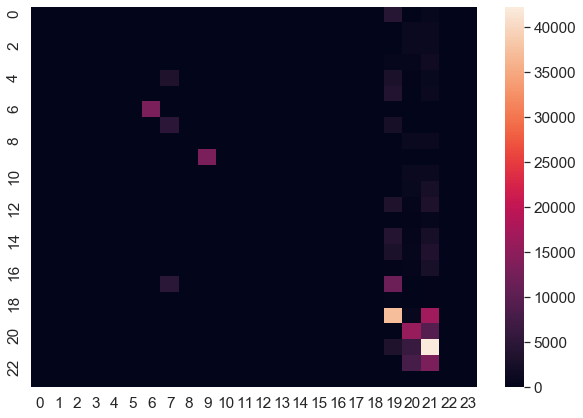

In [136]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(array)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=False) # font size

plt.show()